In [ ]:
'''
Linear Regression:

Definition:
It is a supervised learning algorithm used for predicting a continuous target variable based on one or more input variables(features). 
It assumes a linear relationship between the input features and the output.

Example:
PRedicting the price of a house based on its size, number of bedrooms, and location.

Mathematical Representation:
y = β0 + β1*x1 + β2*x2 + ... + βn*xn + ε

Where:
- y is the predicted value (target variable)
- β0 is the y-intercept (bias term)
- β1, β2, ..., βn are the coefficients (weights) for each feature
- x1, x2, ..., xn are the input features

or,
h(x) = θ0 + θ1*x1 + θ2*x2 + ... + θn*xn
where:
- h(x) is the predicted value
- θ0 is the y-intercept (bias term)
- θ1, θ2, ..., θn are the coefficients (weights) for each feature
- x1, x2, ..., xn are the input features

or h(x) = w*x + b
where:
- h(x) is the predicted value
- w is the weight vector (coefficients)
- b is the bias term
- x is the input feature vector
'''

In [ ]:
'''
2 Types of Linear Regression:
1. Simple Linear Regression:
   - Involves one input feature (x) and one output variable (y).
   - The relationship is modeled as a straight line.
   - Example: Predicting the price of a car based on its age.   
2. Multiple Linear Regression:
   - Involves multiple input features (x1, x2, ..., xn) and
    one output variable (y).
    - The relationship is modeled as a hyperplane in higher dimensions.

    
'''

In [ ]:
'''
Simple Linear Regression:

Equation:
y = β0 + β1*x + ε
Where:
- y is the predicted value (target variable)
- β0 is the y-intercept (bias term)
- β1 is the coefficient (weight) for the feature x
- x is the input feature

or the prediction function can be represented as:
hθ(x) = θ0 + θ1*x

where:
- hθ(x) is the predicted value
- θ0 is the y-intercept (bias term)
- θ1 is the coefficient (weight) for the feature x or slope
Example:
Predicting the price of a car based on its age.

'''

In [ ]:
'''
Multiple Linear Regression:
Equation:
h(x) = θ0 + θ1*x1 + θ2*x2 + ... + θn*xn
or h(θ) = θ^T * x

Where:
- h(x) is the predicted value (target variable)
- θ0 is the y-intercept (bias term)
- θ1, θ2, ..., θn are the coefficients (weights) for each feature
- x1, x2, ..., xn are the input features
- θ^T is the transpose of the parameter vector θ or dot product of θ and x
and θ is parameter vector containing the coefficients (weights) and bias term
and x in this case is a vector of input features.

Example:
Predicting the price of a house based on its size, number of bedrooms, and location.
'''

In [ ]:
'''
Cost Function:
The cost function for linear regression is used to measure how well the model's predictions match the actual target values.

J(θ) = (1/2m) * Σ(h(x_i) - y_i)^2
where:
- J(θ) is the cost function
- m is the number of data points (training examples)
- h(x_i) is the predicted value for the i-th example
- y_i is the actual target value for the i-th example

The most common cost function used is the Mean Squared Error (MSE), which is defined as:
MSE = (1/n) * Σ(y_i - h(x_i))^2
where:
- n is the number of training examples 
- y_i is the actual target value for the i-th example
- h(x_i) is the predicted value for the i-th example
- Σ denotes the summation over all training examples
The goal of linear regression is to minimize the cost function by adjusting the model parameters (weights and bias).


'''

Final parameters (weights): [0.11071521 0.95129619]


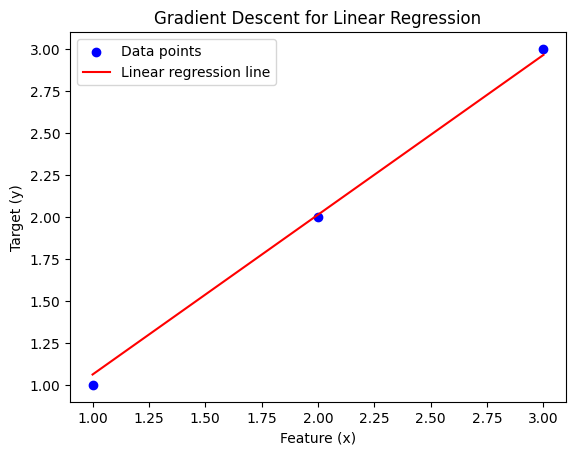

In [ ]:
'''
Descent Gradient:
The gradient descent algorithm is used to minimize the cost function in linear regression by iteratively 
updating the model parameters (weights and bias).
The update rule for gradient descent is as follows:
θ_j := θ_j - α * (1/m) * Σ(h(x_i) - y_i) * x_i
where:
- θ_j is the j-th parameter (weight or bias)
- α is the learning rate (step size)
- m is the number of training examples
- h(x_i) is the predicted value for the i-th example
- y_i is the actual target value for the i-th example
- x_i is the input feature for the i-th example
- Σ denotes the summation over all training examples
'''
# Descent Gradient:
import numpy as np
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)  # number of training examples
    for _ in range(num_iterations):
        predictions = X.dot(theta)  # h(x) = X * theta
        errors = predictions - y  # h(x) - y
        gradient = (1/m) * X.T.dot(errors)  # (1/m) * X^T * (h(x) - y)
        theta -= alpha * gradient  # θ := θ - α * gradient
    return theta
# Example usage:
X = np.array([[1, 1], [1, 2], [1, 3]])  # Input features (with bias term)
y = np.array([1, 2, 3])  # Target variable
theta_initial = np.array([0, 0], dtype=float)  # Initial parameters (weights) as float
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations for gradient descent
theta_final = gradient_descent(X, y, theta_initial, alpha, num_iterations)
print("Final parameters (weights):", theta_final)

# plotting the descent gradient
import matplotlib.pyplot as plt
def plot_gradient_descent(X, y, theta):
    plt.scatter(X[:, 1], y, color='blue', label='Data points')
    plt.plot(X[:, 1], X.dot(theta), color='red', label='Linear regression line')
    plt.xlabel('Feature (x)')
    plt.ylabel('Target (y)')
    plt.title('Gradient Descent for Linear Regression')
    plt.legend()
    plt.show()
# Example usage of plotting function
plot_gradient_descent(X, y, theta_final)


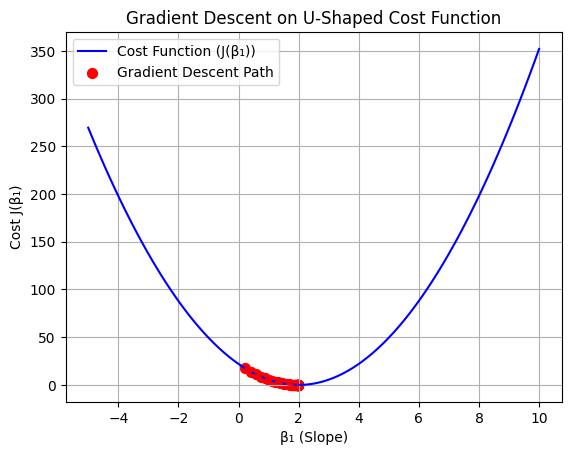

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for simple linear regression
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Cost function J(beta_1) for a fixed beta_0 (for simplicity)
def cost_function(beta_1, X, y, beta_0=0):
    m = len(X)
    y_pred = beta_0 + beta_1 * X
    return (1/(2*m)) * np.sum((y_pred - y)**2)

# Gradient descent
def gradient_descent(X, y, beta_0=0, beta_1=0, alpha=0.01, iterations=100):
    m = len(X)
    cost_history = []
    beta_1_history = []
    
    for _ in range(iterations):
        y_pred = beta_0 + beta_1 * X
        error = y_pred - y
        beta_1 -= alpha * (1/m) * np.sum(error * X)
        cost = cost_function(beta_1, X, y, beta_0)
        cost_history.append(cost)
        beta_1_history.append(beta_1)
    
    return beta_1_history, cost_history

# Run gradient descent
beta_1_history, cost_history = gradient_descent(X, y, alpha=0.01, iterations=50)

# Generate points for the U-shaped cost function curve
beta_1_range = np.linspace(-5, 10, 100)
costs = [cost_function(b, X, y) for b in beta_1_range]

# Plot
plt.plot(beta_1_range, costs, label='Cost Function (J(β₁))', color='blue')
plt.scatter(beta_1_history, cost_history, color='red', label='Gradient Descent Path', s=50)
plt.plot(beta_1_history, cost_history, color='red', linestyle='--')
plt.xlabel('β₁ (Slope)')
plt.ylabel('Cost J(β₁)')
plt.title('Gradient Descent on U-Shaped Cost Function')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
Convergence Algorithm:
- Definition:
    The convergence algorithm for linear regression is the process of iteratively 
    adjusting the model parameters (weights and bias) to minimize the cost function until a stopping criterion is met.
    (weight is coefficient of the feature (slope)and bias is the y-intercept)
- The convergence algorithm for linear regression is typically implemented using gradient descent.
- The convergence is determined by checking if the change in the cost function 
    or the parameters is below a specified threshold or if a maximum number of iterations is reached.

Mathematically, this can be represented as in derivative form:
θ_j := θ_j - α * ∂J(θ)/∂θ_j
where:
- θ_j is the j-th parameter (weight or bias)
- α is the learning rate (step size)
- ∂J(θ)/∂θ_j is the partial derivative of the cost function with respect to the j-th parameter
- The algorithm iteratively updates the parameters until convergence is achieved.
 

Learning Rate (α):
- The learning rate is a crucial hyperparameter in the gradient descent algorithm.
- It need to be add or subtracted to the parameters during each iteration, when derivative is positive or negative respectively.
- It determines the size of the steps taken towards the minimum of the cost function during each iteration.
- If the learning rate is too small, convergence will be very slow.
- If the learning rate is too large, the algorithm may overshoot the minimum or even diverge, causing the cost function to increase instead of decrease.
- A proper learning rate ensures that the cost function decreases smoothly and the algorithm converges efficiently.
- It is common practice to experiment with different learning rates or use techniques like learning rate schedules or adaptive learning rates to achieve optimal convergence.


the algorithm stops when in sync with the convergence criteria :
- The change in the cost function is below a specified threshold (e.g., |J(θ_new) - J(θ_old)| < ε)
- The change in the parameters is below a specified threshold (e.g., ||θ_new - θ_old|| < ε)
- ε is a small positive number (tolerance level) 
- A maximum number of iterations is reached (e.g., num_iterations < max_iter)

- The algorithm also checks if the cost function is decreasing or not.
Also, we have to check if the cost function is decreasing or not, if it is not decreasing then have to stop the algorithm.
- If the cost function is not decreasing, indicates that the learning rate is too high or the model is not converging properly.


Step-by-Step Process mathematically:
1. Initialize the parameters (weights and bias) to random values or zeros.
2. For each iteration:
    - Compute the predicted values using the current parameters: h(x) = X * θ
    - Calculate the cost function: J(θ) = (1/2m) * Σ(h(x_i) - y_i)^2
    - Compute the gradients: ∂J(θ)/∂θ_j = (1/m) * Σ(h(x_i) - y_i) * x_i
    - Update the parameters: θ_j := θ_j - α * ∂J(θ)/∂θ_j (we have to add or subtract the learning rate to the parameters depending on the sign of the derivative)
    - Check for convergence criteria (change in cost function or parameters)


'''